In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seg_data=pd.read_csv("segmentation data.csv")
seg_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
seg_data["Age"].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
30     70
29     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
43     33
41     33
45     31
44     30
49     29
48     29
47     26
20     23
50     23
57     20
51     19
52     19
54     17
53     16
63     15
64     14
61     13
60     13
65     12
58     12
67     10
56     10
55     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
73      3
70      3
18      3
75      2
76      1
72      1
Name: count, dtype: int64

In [4]:
purchase_data=pd.read_csv("purchase data.csv")




In [5]:
purchase_data["Age"].value_counts()

Age
27    2859
35    2859
31    2759
32    2487
25    2436
26    2403
40    2265
37    2155
36    2011
33    1931
24    1852
34    1811
38    1575
43    1523
30    1513
28    1402
39    1392
45    1339
23    1251
46    1180
49    1091
29    1045
47    1036
51    1032
41    1002
52     986
48     967
44     962
42     958
57     918
65     714
61     683
53     671
63     652
60     585
50     558
55     556
64     546
58     472
54     468
21     467
67     457
56     414
59     402
66     357
22     319
68     269
18     235
20     196
73     121
19     106
71     101
74      94
70      92
62      86
75      72
Name: count, dtype: int64

In [6]:
seg_data["Occupation"].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

In [10]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(seg_data) 

Column: ID
Outliers: 0
Column: Sex
Outliers: 0
Column: Marital status
Outliers: 0
Column: Age
Outliers: 57
Column: Education
Outliers: 614
Column: Income
Outliers: 83
Column: Occupation
Outliers: 0
Column: Settlement size
Outliers: 0


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [11]:
seg_data["Education"].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

In [12]:
seg_data["Age"].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
30     70
29     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
43     33
41     33
45     31
44     30
49     29
48     29
47     26
20     23
50     23
57     20
51     19
52     19
54     17
53     16
63     15
64     14
61     13
60     13
65     12
58     12
67     10
56     10
55     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
73      3
70      3
18      3
75      2
76      1
72      1
Name: count, dtype: int64

In [ ]:
q1 = seg_data['Income'].quantile(0.25)
q3 = seg_data['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_income = seg_data[(seg_data['Income'] < lower_bound) | (seg_data['Income'] > upper_bound)]
outlier_incomes = outliers_income['Income'].unique()
outlier_incomes

array([261952, 202575, 227385, 241068, 268340, 244716, 204723, 214204,
       208101, 224998, 211229, 214364, 217651, 222294, 236264, 207783,
       215150, 244541, 210017, 214620, 202997, 219319, 213333, 209856,
       272314, 309364, 281923, 260977, 201699, 220923, 230883, 220050,
       219451, 222360, 205383, 221842, 217450, 254449, 208446, 227021,
        35832, 201656, 223630, 223018, 255198, 235417, 250050, 235660,
       215639, 212020, 231992, 279593, 200298, 199711, 237799, 200621,
       308491, 287247, 268906, 207262, 223185, 203738, 280570, 214126,
       267872, 218664, 224961, 262634, 287106, 281084, 273063, 308529,
       199654, 213768, 214732, 205476, 280566, 211572, 260847, 285647,
       281647,  36760])

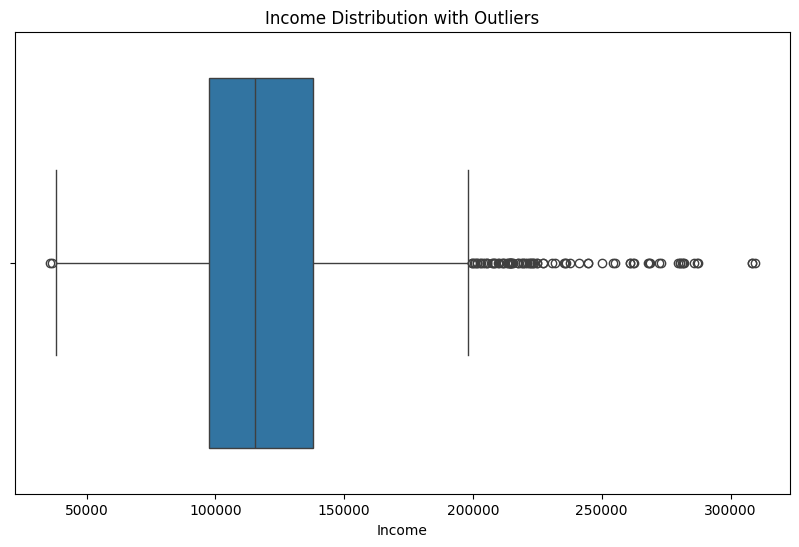

In [17]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=seg_data['Income'])
plt.title('Income Distribution with Outliers')
plt.xlabel('Income')
plt.show()

##  Investigating Outliers  

We identified potential outliers in three variables:  

### 1. Education  
- Unusual values detected: **2, 0, 3**  
- These values fall outside the expected education categories (normally categorical levels like High School, College, Graduate, etc.).  
- **Suggestion**: Validate coding or recode these values into proper categories.  

---

### 2. Age  
- Outlier values detected: **66, 62, 68, 19, 59, 71, 74, 73, 70, 18, 75, 76, 72**  
- Most ages are clustered around 18–76.  
- Ages **18 and 19** may represent the lower boundary (very young customers).  
- Ages **70–76** may represent the higher boundary (older customers, less common in dataset).  
- **Suggestion**: Check if these reflect real customers or data entry issues. If valid, they represent special segments (very young and senior customers).  

---

### 3. Income  
- Outliers identified: **200,000 – 300,000**  
- This is significantly higher than typical income ranges in consumer datasets.  
- **Suggestion**: Verify if these incomes are valid (e.g., high-net-worth individuals) or errors (extra zeros).  

---

###  Conclusion  
- **Education outliers** most of people on 1.  
- **Age outliers** reflect boundary populations (youngest and oldest customers).  
- **Income outliers** could indicate a distinct high-income customer segment, or possible entry errors.  
